### 1.0 Предварительная обработка данных
- Сократить размерность исходного набора данных минимум одним методом фильтрации (применить знания из прошлого семестра)

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('data_practice.csv')

In [8]:
df

,smiles,A,B,C,mu,alpha,homo,lumo,gap,r2,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,N#CC12CC1CO2,5.99438,2.27301,1.94738,4.5933,55.81,-0.2627,-0.0086,0.2541,650.3290,...,0,0,0,0,0,0,0,0,0,0
1,COCC(O)C#CC=O,2.32923,0.75737,0.59946,3.4068,77.34,-0.2697,-0.0657,0.2040,1808.5114,...,0,0,0,0,0,0,0,0,0,0
2,COC1C2CC(=NO)C12,2.71950,1.23126,1.02616,1.2920,76.75,-0.2258,0.0156,0.2414,1215.4323,...,0,0,0,0,0,0,0,0,0,0
3,CC(CC=O)OCC#C,2.29944,0.85305,0.65285,3.1488,79.50,-0.2438,-0.0199,0.2239,1685.1071,...,0,0,0,1,0,0,0,0,0,0
4,COC(=N)N1CCC1=N,3.03493,1.26316,0.90731,1.9135,77.81,-0.2343,0.0056,0.2400,1271.6972,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,C1CC1(CCC#N)C=O,2.81953,0.95253,0.78315,5.6157,77.77,-0.2667,-0.0340,0.2328,1442.5369,...,0,0,0,0,0,0,0,0,0,0
4996,CCN1C2CC3OC2C13,4.22393,1.23139,1.15079,1.2093,78.14,-0.2139,0.0760,0.2898,1141.0494,...,0,0,0,0,0,0,0,0,0,0
4997,CN1C2CC(O)CC12C,2.40023,1.44261,1.26824,2.0425,81.95,-0.2130,0.0709,0.2839,1145.1258,...,0,0,0,0,0,0,0,0,0,0
4998,c1cnc([nH]1)OC=O,8.05652,1.25277,1.08801,4.1565,58.08,-0.2300,-0.0153,0.2147,988.9973,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df2 = df

In [10]:
# Информация по таблице 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 230 entries, smiles to fr_urea
dtypes: float64(119), int64(110), object(1)
memory usage: 8.8+ MB


In [11]:
#Поиск пропусков в датасете с помощью функции DataFrame isnull()
missing_values = df2.isnull().sum().sort_values(ascending=False)
print("Missing values in the data:")
print(missing_values)

Missing values in the data:
smiles              0
A                   0
B                   0
C                   0
mu                  0
                   ..
fr_thiazole         0
fr_thiocyan         0
fr_thiophene        0
fr_unbrch_alkane    0
fr_urea             0
Length: 230, dtype: int64


In [12]:
#проверка на наличие дубликатов
df2.duplicated().sum()

np.int64(0)

In [13]:
# Выведем колонки, содержащие строковый тип данных
string_columns = df2.select_dtypes(include=['object']).columns.tolist()      # преобразуем через .tolist() индекс столбцов в список
print(f"Столбцы со строковым типом данных: {string_columns}")       # выведем переменную

Столбцы со строковым типом данных: ['smiles']


In [14]:
# Удалим столбцы, содержащие строковый тип данных, для облегчения дальнейшей обработки данных
df2.drop(string_columns, axis = 1, inplace = True)        # inplace - метод будет применяться к исходному датафрейму и не будет возвращать новый
df2

,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,5.99438,2.27301,1.94738,4.5933,55.81,-0.2627,-0.0086,0.2541,650.3290,0.090625,...,0,0,0,0,0,0,0,0,0,0
1,2.32923,0.75737,0.59946,3.4068,77.34,-0.2697,-0.0657,0.2040,1808.5114,0.131823,...,0,0,0,0,0,0,0,0,0,0
2,2.71950,1.23126,1.02616,1.2920,76.75,-0.2258,0.0156,0.2414,1215.4323,0.146098,...,0,0,0,0,0,0,0,0,0,0
3,2.29944,0.85305,0.65285,3.1488,79.50,-0.2438,-0.0199,0.2239,1685.1071,0.154138,...,0,0,0,1,0,0,0,0,0,0
4,3.03493,1.26316,0.90731,1.9135,77.81,-0.2343,0.0056,0.2400,1271.6972,0.147974,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.81953,0.95253,0.78315,5.6157,77.77,-0.2667,-0.0340,0.2328,1442.5369,0.146377,...,0,0,0,0,0,0,0,0,0,0
4996,4.22393,1.23139,1.15079,1.2093,78.14,-0.2139,0.0760,0.2898,1141.0494,0.172360,...,0,0,0,0,0,0,0,0,0,0
4997,2.40023,1.44261,1.26824,2.0425,81.95,-0.2130,0.0709,0.2839,1145.1258,0.194093,...,0,0,0,0,0,0,0,0,0,0
4998,8.05652,1.25277,1.08801,4.1565,58.08,-0.2300,-0.0153,0.2147,988.9973,0.084993,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Проведем фильтрацию по корреляции

# Импортируем необходимый класс библиотеки для стандартизации признаков (среднее значение 0, стандартное отклонение 1)
from sklearn.preprocessing import StandardScaler

cols = df2.columns        # сохраним имена всех колонок в переменную
sc = StandardScaler()        # зададим экземпляр для стандартизации данных
X_std = sc.fit_transform(df2[cols].values)         # извлечем значения всех столбцов, вычислим параметры (среднее и стандартное отклонение), которые применим для стандартизации 
X_std

array([[ 1.94455109,  1.91818951,  2.45854935, ...,  0.        ,
        -0.08259966, -0.09313754],
       [-0.78226161, -1.41046755, -1.5566255 , ...,  0.        ,
        -0.08259966, -0.09313754],
       [-0.491907  , -0.36970768, -0.28557447, ...,  0.        ,
        -0.08259966, -0.09313754],
       ...,
       [-0.72943875,  0.09446038,  0.43553177, ...,  0.        ,
        -0.08259966, -0.09313754],
       [ 3.47875011, -0.32246729, -0.10133611, ...,  0.        ,
        -0.08259966, -0.09313754],
       [-0.44139049, -0.08321265, -0.44955703, ...,  0.        ,
        -0.08259966, -0.09313754]], shape=(5000, 229))

In [16]:
import numpy as np

In [17]:
FILTER_THRESHOLD = 0.8      # зададим пороговое значение для корреляции (столбцы с корреляцией выше этого значения будут удалены)
cov_mat = np.cov(X_std.T)       # вычислим матрицу ковариации для стандартизированных данных
cov_mat_df = pd.DataFrame(cov_mat, columns=cols)        # преобразуем матрицу ковариации в датафрейм, где имена столбцов будут соответствовать именам столбцов из df_rd        

# Строка создает верхнюю треугольную матрицу ковариации, чтобы сосредоточиться только на значениях корреляции между различными парами переменных
upper_tri = cov_mat_df.where(
    np.triu(
        np.ones(cov_mat_df.shape), k=1).astype(np.bool_)
        )

# Создадим список, который содержит имена столбцов, корреляция которых с другими столбцами превышет установленный порог
to_drop_cor = [column for column in upper_tri.columns if any(abs(upper_tri[column]) > FILTER_THRESHOLD)]
# Удалим столбцы 
df_after_cor = df2.drop(to_drop_cor, axis=1)
# Обновим исходный датафрейм и присвоим ему новые значения
df2 = df_after_cor
df2

,A,B,mu,alpha,homo,lumo,zpve,u0,cv,MaxAbsEStateIndex,...,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,5.99438,2.27301,4.5933,55.81,-0.2627,-0.0086,0.090625,-323.338627,21.459,8.311944,...,0,0,0,0,0,0,0,0,0,0
1,2.32923,0.75737,3.4068,77.34,-0.2697,-0.0657,0.131823,-458.914682,35.183,9.588026,...,0,0,0,0,0,0,0,0,0,0
2,2.71950,1.23126,1.2920,76.75,-0.2258,0.0156,0.146098,-438.996978,32.710,8.328809,...,0,0,0,0,0,0,0,0,0,0
3,2.29944,0.85305,3.1488,79.50,-0.2438,-0.0199,0.154138,-422.988608,36.895,9.846767,...,0,0,0,0,0,0,0,0,0,0
4,3.03493,1.26316,1.9135,77.81,-0.2343,0.0056,0.147974,-435.272093,32.448,7.125972,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.81953,0.95253,5.6157,77.77,-0.2667,-0.0340,0.146377,-401.969669,33.153,10.285547,...,0,0,0,0,0,0,0,0,0,0
4996,4.22393,1.23139,1.2093,78.14,-0.2139,0.0760,0.172360,-403.082393,30.043,5.502454,...,0,0,0,0,0,0,0,0,0,0
4997,2.40023,1.44261,2.0425,81.95,-0.2130,0.0709,0.194093,-404.332161,36.045,9.186319,...,0,0,0,0,0,0,0,0,0,0
4998,8.05652,1.25277,4.1565,58.08,-0.2300,-0.0153,0.084993,-414.713710,23.621,9.590000,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Проведем фильтрацию по дисперсии

FILTER_THRESHOLD = 0.1      # зададим пороговое значение для дисперсии
columns = df2.columns     # сохраним имена всех колонок в переменную
variance = df2.var()      # вычислим дисперсию для каждого столбца

# Создадим список, который содержит имена столбцов, дисперсия которых, меньше установленного порога
to_drop = [column for column in variance.index if variance[column] < FILTER_THRESHOLD]      # для каждого столбца проверяется, меньше ли его дисперсия порога, если да то имя столбца добавляется в список     

# Удалим столбцы с низкой дисперсией
df_after_disp = df2.drop(to_drop, axis=1)
# Обновим исходный датафрейм и присвоим ему новые значения
df2 = df_after_disp
df2

,A,B,mu,alpha,u0,cv,MaxAbsEStateIndex,MinEStateIndex,SPS,MolWt,...,fr_NH0,fr_NH1,fr_aldehyde,fr_allylic_oxid,fr_amide,fr_bicyclic,fr_ether,fr_ketone,fr_nitrile,fr_piperdine
0,5.99438,2.27301,4.5933,55.81,-323.338627,21.459,8.311944,-0.263889,53.857143,95.101,...,1,0,0,0,0,1,1,0,1,0
1,2.32923,0.75737,3.4068,77.34,-458.914682,35.183,9.588026,-0.847037,11.333333,128.127,...,0,0,1,0,0,0,1,0,0,0
2,2.71950,1.23126,1.2920,76.75,-438.996978,32.710,8.328809,0.371204,50.333333,127.143,...,1,0,0,0,0,1,1,0,0,0
3,2.29944,0.85305,3.1488,79.50,-422.988608,36.895,9.846767,-0.043009,12.000000,126.155,...,0,0,1,0,0,0,1,0,0,0
4,3.03493,1.26316,1.9135,77.81,-435.272093,32.448,7.125972,0.075231,17.000000,127.147,...,1,2,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.81953,0.95253,5.6157,77.77,-401.969669,33.153,10.285547,-0.059792,20.333333,123.155,...,1,0,1,0,0,0,0,0,1,0
4996,4.22393,1.23139,1.2093,78.14,-403.082393,30.043,5.502454,0.638843,61.000000,125.171,...,1,0,0,0,0,0,1,0,0,0
4997,2.40023,1.44261,2.0425,81.95,-404.332161,36.045,9.186319,-0.017407,63.666667,127.187,...,1,0,0,0,0,1,0,0,0,1
4998,8.05652,1.25277,4.1565,58.08,-414.713710,23.621,9.590000,0.222222,8.500000,112.088,...,1,1,0,0,0,0,1,0,0,0


### 1.1. Регрессионная модель для переменной gap

Построить регрессионную модель машинного обучения для предсказания переменной gap

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [20]:
!pip install seaborn

In [21]:
import seaborn as sns

In [22]:
y = df['gap']
x = df2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) # test_size - 0.5

MinMaxScaler из модуля sklearn.preprocessing предназначен для нормализации данных перед использованием в моделях машинного обучения

In [23]:
# предварительная обработка данных перед обучением МО

from sklearn.preprocessing import MinMaxScaler # нормализация 

# Создаётся экземпляр MinMaxScaler, который будет масштабировать данные так, чтобы они находились в диапазоне от 0 до 1.
sc = MinMaxScaler(feature_range=(0, 1))
# Метод fit_transform сначала вычисляет минимальные и максимальные значения из x_train, а затем применяет преобразование, масштабируя все значения в диапазон от 0 до 1.
x_train = sc.fit_transform(x_train)
# Метод transform используется здесь для масштабирования тестового набора данных x_test с использованием параметров, найденных на обучающем наборе. 
x_test = sc.transform(x_test)

In [24]:
y_train

2913    0.2585
3275    0.2236
775     0.1793
217     0.2237
1245    0.2782
         ...  
4931    0.3080
3264    0.2099
1653    0.3039
2607    0.2494
2732    0.2071
Name: gap, Length: 4000, dtype: float64

In [25]:
y_test

398     0.2240
3833    0.2978
4836    0.2091
4572    0.2209
636     0.3263
         ...  
4228    0.3187
2367    0.2605
788     0.2479
1452    0.2275
3265    0.1767
Name: gap, Length: 1000, dtype: float64

Возможно, имелось в виду предупреждение RuntimeWarning: Invalid Value Encountered in Log. Оно возникает, когда пытаются вычислить логарифм нуля или отрицательного числа.


Две последние строки сверху: применяется логарифмическое преобразование (по основанию 10) к целевым значениям y_train и y_test. Это может быть полезно, например, для обработки данных с большой дисперсией или для приведения распределения к более нормальному виду.


Далее происходит реализация обучения и оценки модели регрессии с использованием алгоритма случайного леса (RandomForestRegressor). Алгоритм случайного леса относится к параллельным методам. Когда модели учатся одновременно. Производительность каждой из N моделей не зависит от других, результат усредняется

Вначале создаётся экземпляр класса RandomForestRegressor. 
   - n_estimators=100 задаёт количество деревьев в лесу (100 деревьев).
   - min_samples_leaf=1 указывает минимальное количество образцов, необходимых для листа дерева (может быть изменено для увеличения целостности модели).
   - criterion='mae' устанавливает критерий оценки качества разбиения (в данном случае - средняя абсолютная ошибка)

#### Реализация модели случайного леса


r2_score: 0.911854869592317
Mean Absolute Error: 0.010446688000000004
Mean Squared Error: 0.00020176275607200012
Root Mean Squared Error: 0.014204321739245422
RandomForestRegressor()
r_score: 0.9549109223337625
r2_score: 0.9861702051205108
Mean Absolute Error: 0.003920720750000001
Mean Squared Error: 3.152036098875002e-05
Root Mean Squared Error: 0.005614299688184629
RandomForestRegressor()
r_score: 0.9930610278933066


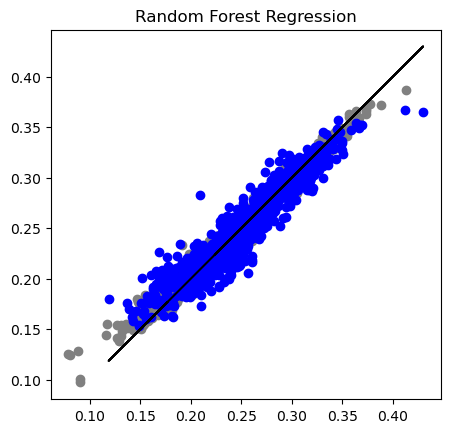

In [26]:
regressor = RandomForestRegressor() # делаем пустые скобки, потому что мы не знаем входные параметры, модель возьмет базовые 
regressor.fit(x_train, y_train) #обучение модели на обучающих данных (признаках и целевых переменных)

# прогноз на тестовых и обучающих данных - получаем предсказание на данных
y_pred = regressor.predict(x_test) # на тестовых
y1_pred = regressor.predict(x_train) # перепроверка на тренировочных

# metrics - оценка метрик на тестовом наборе
print('r2_score:', metrics.r2_score(y_test, y_pred)) # коэффициент детерминации
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) # средняя абсолютная ошибка
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) # средяя кватратичная ошибка
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # корень из средней квадратичной ошибки
print(regressor)
print('r_score:', np.sqrt(metrics.r2_score(y_test, y_pred)))
# metrics - оценка метрик на обучающем наборе
print('r2_score:', metrics.r2_score(y_train, y1_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
print(regressor)
print('r_score:', np.sqrt(metrics.r2_score(y_train, y1_pred)))

# визуалилация результатов
plt.scatter(y_train, y1_pred, color='gray') # серый - предсказания на обучающем наборе
plt.scatter(y_test, y_pred, color='blue') # синий - предсказание на тестовом наборе 
plt.plot(y_test, y_test, color='black') # черный - линия идеального соответствия между предсказанными и истинными значениями
plt.title('Random Forest Regression') 
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#### Реализация линейной модели



In [27]:
from sklearn.linear_model import LinearRegression

r2_score: 0.8450467915300581
Mean Absolute Error: 0.014493916294211406
Mean Squared Error: 0.0003546853497010605
Root Mean Squared Error: 0.01883309187842136
LinearRegression()
r_score: 0.9192642664272652
r2_score: 0.8708146213171077
Mean Absolute Error: 0.013187974015512886
Mean Squared Error: 0.00029443457448470383
Root Mean Squared Error: 0.01715909596933078
LinearRegression()
r_score: 0.9331744859977193


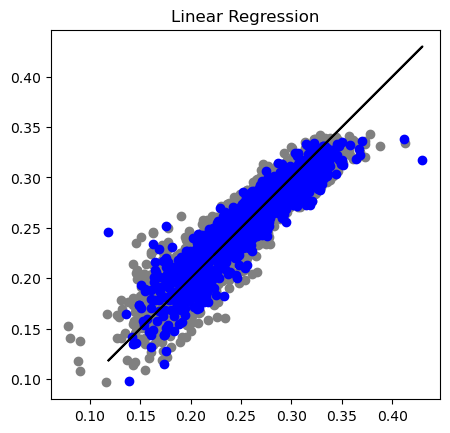

In [28]:
regressor2 = LinearRegression() # делаем пустые скобки, потому что мы не знаем входные параметры, модель возьмет базовые 
regressor2.fit(x_train, y_train) #обучение модели на обучающих данных (признаках и целевых переменных)

# прогноз на тестовых и обучающих данных - получаем предсказание на данных
y_pred = regressor2.predict(x_test) # на тестовых
y1_pred = regressor2.predict(x_train) # перепроверка на тренировочных

# metrics - оценка метрик на тестовом наборе
print('r2_score:', metrics.r2_score(y_test, y_pred)) # коэффициент детерминации
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) # средняя абсолютная ошибка
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) # средяя кватратичная ошибка
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # корень из средней квадратичной ошибки
print(regressor2)
print('r_score:', np.sqrt(metrics.r2_score(y_test, y_pred)))
# metrics - оценка метрик на обучающем наборе
print('r2_score:', metrics.r2_score(y_train, y1_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
print(regressor2)
print('r_score:', np.sqrt(metrics.r2_score(y_train, y1_pred)))

# визуалилация результатов
plt.scatter(y_train, y1_pred, color='gray') # серый - предсказания на обучающем наборе
plt.scatter(y_test, y_pred, color='blue') # синий - предсказание на тестовом наборе 
plt.plot(y_test, y_test, color='black') # черный - линия идеального соответствия между предсказанными и истинными значениями
plt.title('Linear Regression') 
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#### Реализация бустинга



In [29]:
from sklearn.ensemble import GradientBoostingRegressor

r2_score: 0.8888372101556125
Mean Absolute Error: 0.012206085621410451
Mean Squared Error: 0.00025444980054963105
Root Mean Squared Error: 0.01595148270693452
GradientBoostingRegressor()
r_score: 0.9427816343966468
r2_score: 0.9173891068127441
Mean Absolute Error: 0.010501813127563256
Mean Squared Error: 0.00018828371624854862
Root Mean Squared Error: 0.013721651367402854
GradientBoostingRegressor()
r_score: 0.9578043155116519


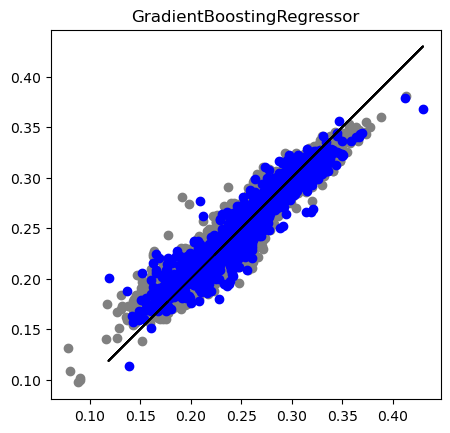

In [30]:
regressor3 = GradientBoostingRegressor() # делаем пустые скобки, потому что мы не знаем входные параметры, модель возьмет базовые 
regressor3.fit(x_train, y_train) #обучение модели на обучающих данных (признаках и целевых переменных)

# прогноз на тестовых и обучающих данных - получаем предсказание на данных
y_pred = regressor3.predict(x_test) # на тестовых
y1_pred = regressor3.predict(x_train) # перепроверка на тренировочных

# metrics - оценка метрик на тестовом наборе
print('r2_score:', metrics.r2_score(y_test, y_pred)) # коэффициент детерминации
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) # средняя абсолютная ошибка
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) # средяя кватратичная ошибка
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # корень из средней квадратичной ошибки
print(regressor3)
print('r_score:', np.sqrt(metrics.r2_score(y_test, y_pred)))
# metrics - оценка метрик на обучающем наборе
print('r2_score:', metrics.r2_score(y_train, y1_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
print(regressor3)
print('r_score:', np.sqrt(metrics.r2_score(y_train, y1_pred)))

# визуалилация результатов
plt.scatter(y_train, y1_pred, color='gray') # серый - предсказания на обучающем наборе
plt.scatter(y_test, y_pred, color='blue') # синий - предсказание на тестовом наборе 
plt.plot(y_test, y_test, color='black') # черный - линия идеального соответствия между предсказанными и истинными значениями
plt.title('GradientBoostingRegressor') 
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### Оптимизация

* max_features -
* min_samples_leaf -
* n_estimators -

Задаем диапазоны параметров

* scoring='neg_mean_squared_error' - на основании чего определяет модель лучше


In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
# Define the dictionary 'params_rf'
params_regressor = {
   'max_features': [1, 10, 20], 
 'min_samples_leaf': [2,5,7,9,10],
 'n_estimators': [70,100,200, 350],
 }

# Import GridSearchCV - модель оптимизации - разделяет сет на некоторое количество подсетов внутри
#from sklearn.model_selection import GridSearchCV
# Instantiate grid_rf
grid_regressor = GridSearchCV(estimator=regressor,
                       param_grid=params_regressor,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

# Fit with train set
grid_regressor.fit(x_train, y_train)



Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': [1, 10, 20],
                         'min_samples_leaf': [2, 5, 7, 9, 10],
                         'n_estimators': [70, 100, 200, 350]},
             scoring='neg_mean_squared_error', verbose=1)

In [33]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Extract the best estimator
best_model = grid_regressor.best_estimator_

# Predict test set labels
y_pred = best_model.predict(x_test)

# Compute rmse_test
rmse_test = MSE(y_test,y_pred)**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test))

Test RMSE of best model: 0.015


r2_score: 0.9028734360363622
Mean Absolute Error: 0.011010627020526695
Mean Squared Error: 0.00022232110999746016
Root Mean Squared Error: 0.01491043627790482
GradientBoostingRegressor()
r_score: 0.950196524954897
r2_score: 0.9173891068127441
Mean Absolute Error: 0.010501813127563256
Mean Squared Error: 0.00018828371624854862
Root Mean Squared Error: 0.013721651367402854
GradientBoostingRegressor()
r_score: 0.9578043155116519


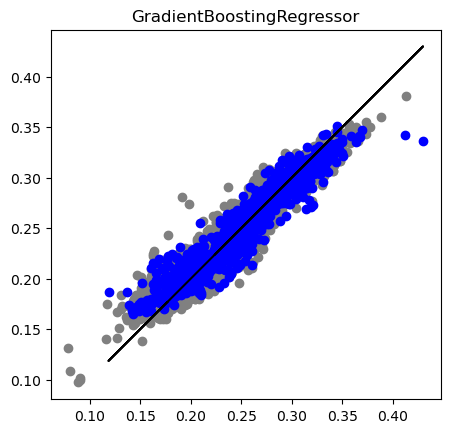

In [34]:
# metrics - оценка метрик на тестовом наборе
print('r2_score:', metrics.r2_score(y_test, y_pred)) # коэффициент детерминации
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) # средняя абсолютная ошибка
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) # средяя кватратичная ошибка
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # корень из средней квадратичной ошибки
print(regressor3)
print('r_score:', np.sqrt(metrics.r2_score(y_test, y_pred)))
# metrics - оценка метрик на обучающем наборе
print('r2_score:', metrics.r2_score(y_train, y1_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
print(regressor3)
print('r_score:', np.sqrt(metrics.r2_score(y_train, y1_pred)))

# визуалилация результатов
plt.scatter(y_train, y1_pred, color='gray') # серый - предсказания на обучающем наборе
plt.scatter(y_test, y_pred, color='blue') # синий - предсказание на тестовом наборе 
plt.plot(y_test, y_test, color='black') # черный - линия идеального соответствия между предсказанными и истинными значениями
plt.title('GradientBoostingRegressor') 
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [35]:
!pip install shap

In [36]:
import shap

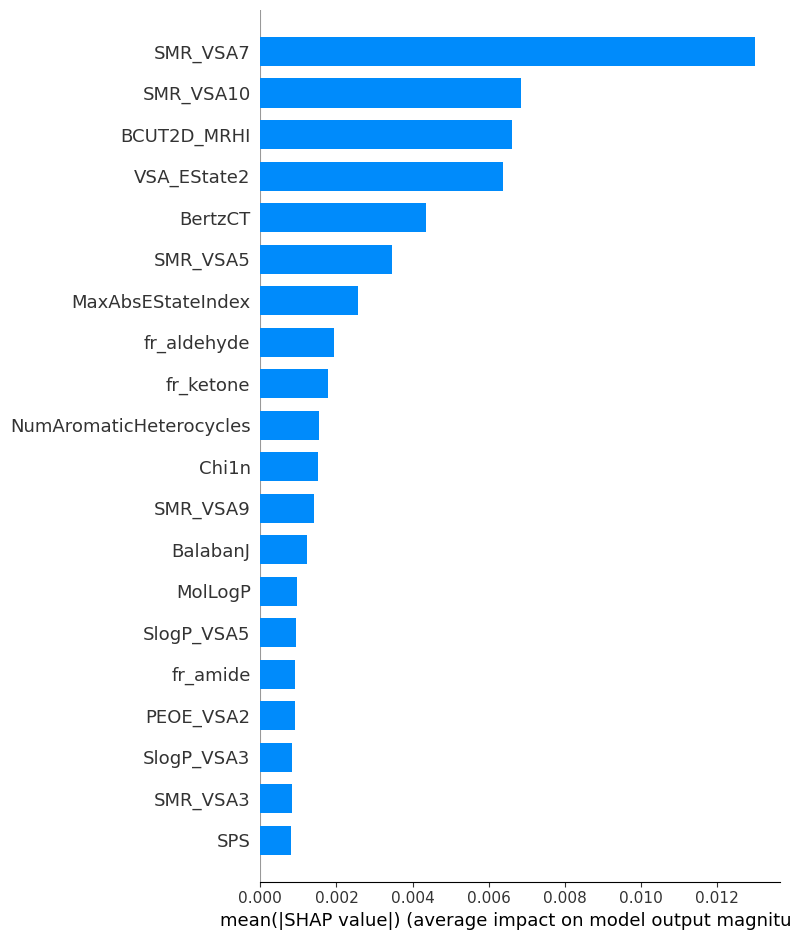

<Figure size 640x480 with 0 Axes>

In [37]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(x_test)
f, ax = plt.subplots(figsize=(13, 10))
shap.summary_plot(shap_values, x, plot_type="bar")
plt.savefig('scratch1.png')

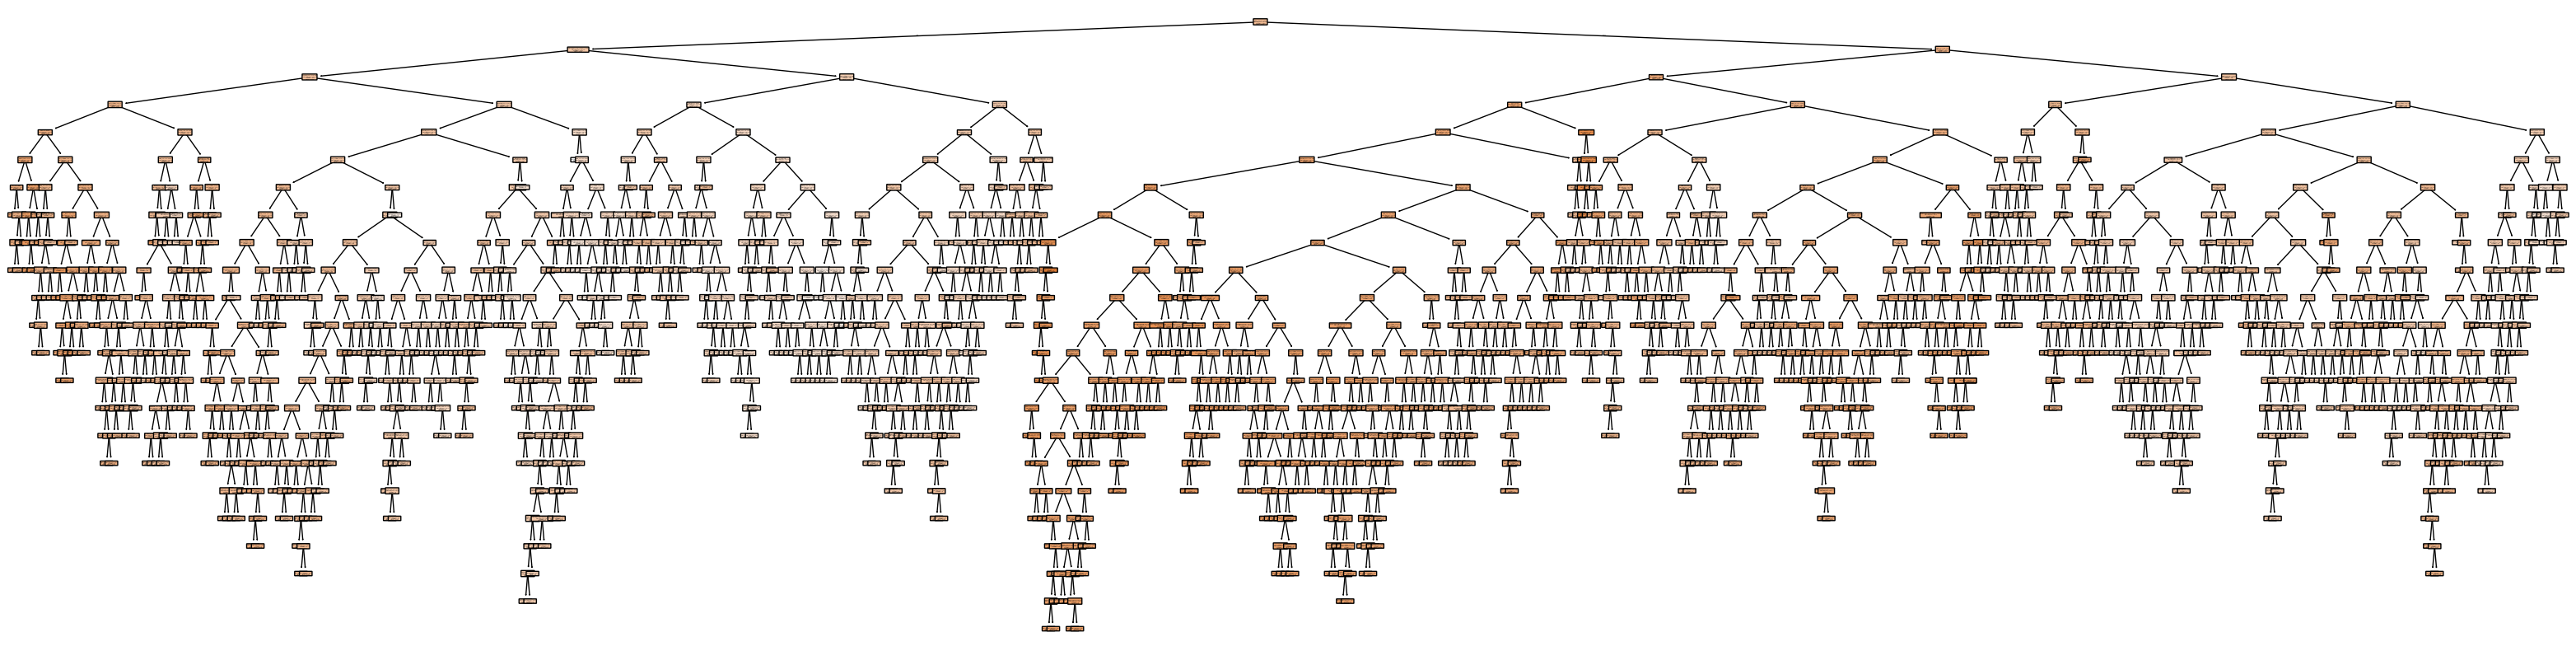

In [43]:
col= x.columns.values.tolist()
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(40, 10))
plot_tree(best_model.estimators_[0],
          feature_names=col,
          filled=True, impurity=True,
          rounded=True)
fig.figure.savefig('tree.jpg', dpi=1200)

### Классификация 

переводим y из непрерывной величины в классовую - перевод в бинарную величину

In [47]:
p = y.median()
p

0.2506

In [50]:
y_binary = []

In [51]:
for value in y:
    if value > p:
        y_binary.append(1)
    else:
        y_binary.append(0)

y_binary = pd.Series(y_binary)

In [52]:
y_binary

0       1
1       0
2       0
3       0
4       0
       ..
4995    0
4996    1
4997    1
4998    0
4999    0
Length: 5000, dtype: int64

In [53]:
y = y_binary
x = df2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) # test_size - 0.5

In [54]:
sc = MinMaxScaler(feature_range=(0, 1))
# Метод fit_transform сначала вычисляет минимальные и максимальные значения из x_train, а затем применяет преобразование, масштабируя все значения в диапазон от 0 до 1.
x_train = sc.fit_transform(x_train)
# Метод transform используется здесь для масштабирования тестового набора данных x_test с использованием параметров, найденных на обучающем наборе. 
x_test = sc.transform(x_test)

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
classificator = GradientBoostingClassifier() # делаем пустые скобки, потому что мы не знаем входные параметры, модель возьмет базовые 
classificator.fit(x_train, y_train) #обучение модели на обучающих данных (признаках и целевых переменных)

# прогноз на тестовых и обучающих данных - получаем предсказание на данных
y_pred =classificator.predict(x_test) # на тестовых

# metrics - оценка метрик на тестовом наборе
print('accuracy:', metrics.accuracy_score(y_test, y_pred)) # 
print('precision', metrics.precision_score(y_test, y_pred)) # 
print('recall:', metrics.recall_score(y_test, y_pred)) # 
print('confusion_matrix:', metrics.confusion_matrix(y_test, y_pred)) # 

accuracy: 0.928
precision 0.9186046511627907
recall: 0.9404761904761905
confusion_matrix: [[454  42]
 [ 30 474]]


In [61]:
from sklearn.ensemble import RandomForestClassifier

classificator2 = RandomForestClassifier() # делаем пустые скобки, потому что мы не знаем входные параметры, модель возьмет базовые 
classificator2.fit(x_train, y_train) #обучение модели на обучающих данных (признаках и целевых переменных)

# прогноз на тестовых и обучающих данных - получаем предсказание на данных
y_pred =classificator2.predict(x_test) # на тестовых

# metrics - оценка метрик на тестовом наборе
print('accuracy:', metrics.accuracy_score(y_test, y_pred)) # 
print('precision', metrics.precision_score(y_test, y_pred)) # 
print('recall:', metrics.recall_score(y_test, y_pred)) # 
print('confusion_matrix:', metrics.confusion_matrix(y_test, y_pred)) # 

accuracy: 0.941
precision 0.9405940594059405
recall: 0.9424603174603174
confusion_matrix: [[466  30]
 [ 29 475]]


In [62]:
from sklearn.linear_model import RidgeClassifier

classificator3 = RidgeClassifier() # делаем пустые скобки, потому что мы не знаем входные параметры, модель возьмет базовые 
classificator3.fit(x_train, y_train) #обучение модели на обучающих данных (признаках и целевых переменных)

# прогноз на тестовых и обучающих данных - получаем предсказание на данных
y_pred =classificator3.predict(x_test) # на тестовых

# metrics - оценка метрик на тестовом наборе
print('accuracy:', metrics.accuracy_score(y_test, y_pred)) # 
print('precision', metrics.precision_score(y_test, y_pred)) # 
print('recall:', metrics.recall_score(y_test, y_pred)) # 
print('confusion_matrix:', metrics.confusion_matrix(y_test, y_pred)) # 

accuracy: 0.92
precision 0.8955223880597015
recall: 0.9523809523809523
confusion_matrix: [[440  56]
 [ 24 480]]


In [76]:
# Define the dictionary 'params_rf'
params_classificator = {
'max_features': [1, 15, 2, 7, 10, 17, 20], 
 'min_samples_leaf': [2,5,7,9,10, 13, 15],
 'n_estimators': [50, 70,100,200,250],
 }

# Import GridSearchCV - модель оптимизации - разделяет сет на некоторое количество подсетов внутри
#from sklearn.model_selection import GridSearchCV
# Instantiate grid_rf
grid_classificator = GridSearchCV(estimator=classificator2,
                       param_grid=params_classificator,
                       scoring='roc_auc',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

# Fit with train set
grid_classificator.fit(x_train, y_train)



Fitting 3 folds for each of 245 candidates, totalling 735 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [1, 15, 2, 7, 10, 17, 20],
                         'min_samples_leaf': [2, 5, 7, 9, 10, 13, 15],
                         'n_estimators': [50, 70, 100, 200, 250]},
             scoring='roc_auc', verbose=1)

In [77]:
# Extract the best estimator
best_model_2 = grid_classificator.best_estimator_

# Predict test set labels
y_pred = best_model_2.predict(x_test)

# Compute rmse_test
rmse_test = MSE(y_test,y_pred)**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test))

Test RMSE of best model: 0.247


In [78]:
print('accuracy:', metrics.accuracy_score(y_test, y_pred)) # 
print('precision', metrics.precision_score(y_test, y_pred)) # 
print('recall:', metrics.recall_score(y_test, y_pred)) # 
print('confusion_matrix:', metrics.confusion_matrix(y_test, y_pred)) # 

accuracy: 0.939
precision 0.9421157684630739
recall: 0.9365079365079365
confusion_matrix: [[467  29]
 [ 32 472]]


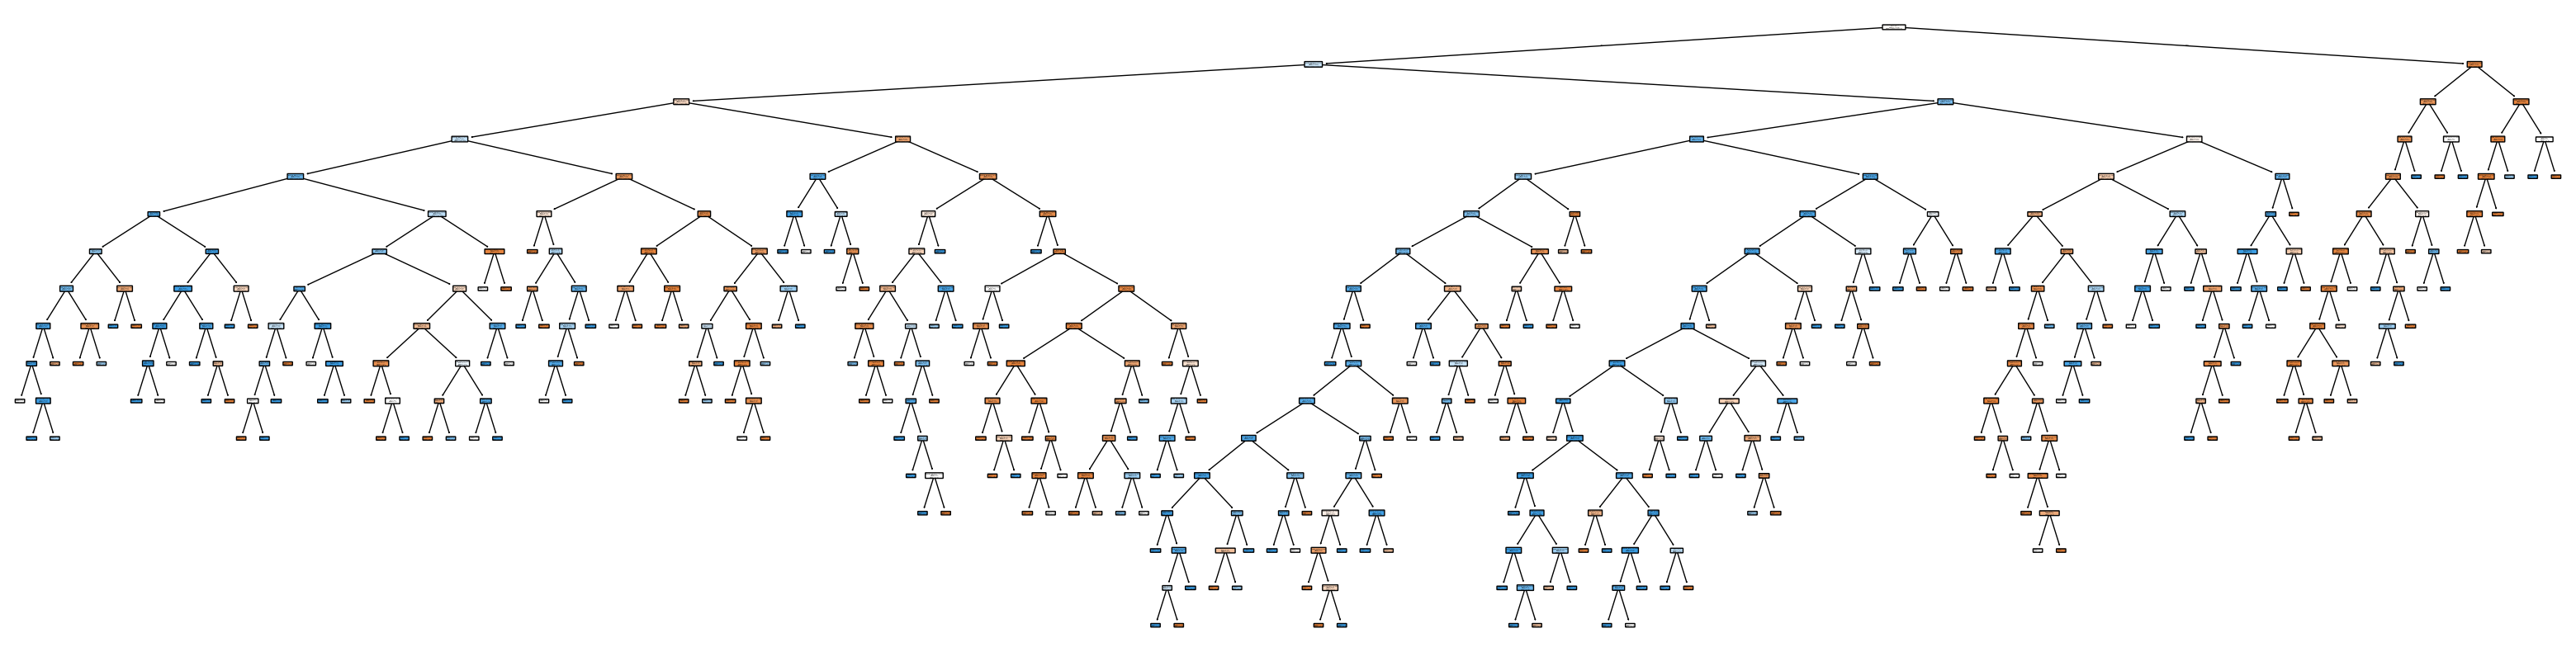

In [80]:
col= x.columns.values.tolist()

fig = plt.figure(figsize=(40, 10))
plot_tree(best_model_2.estimators_[0],
          feature_names=col,
          filled=True, impurity=True,
          rounded=True)
fig.figure.savefig('tree_2.jpg', dpi=1200)